In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/SVM/SVM/mushroom.csv')

In [3]:
# Overview
print(data.shape)  # Dimensions of the dataset
print(data.dtypes)  # Data types of each column


(2000, 26)
Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object


In [4]:
print(data.isnull().sum())  # Missing values

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [5]:
print(data.describe())

        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


 Visualizing Feature Distributions

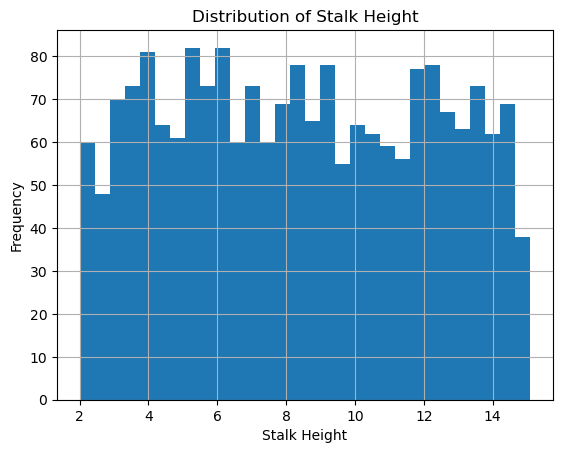

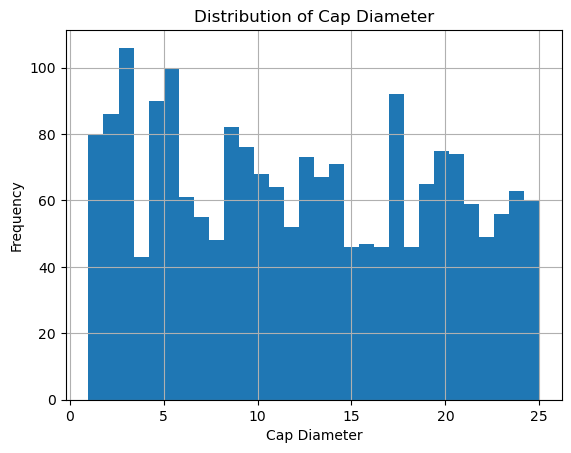

In [6]:
import matplotlib.pyplot as plt

# Histograms
data['stalk_height'].hist(bins=30)
plt.title('Distribution of Stalk Height')
plt.xlabel('Stalk Height')
plt.ylabel('Frequency')
plt.show()

data['cap_diameter'].hist(bins=30)
plt.title('Distribution of Cap Diameter')
plt.xlabel('Cap Diameter')
plt.ylabel('Frequency')
plt.show()

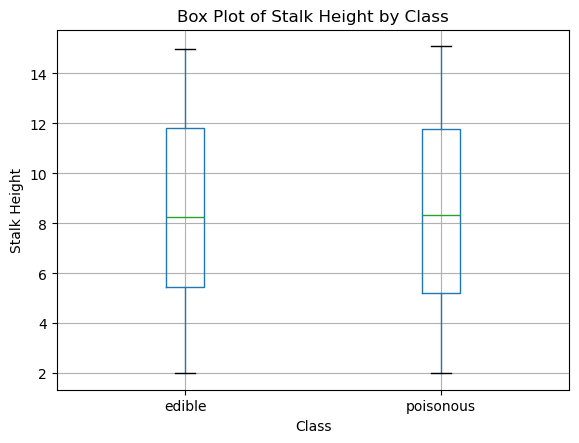

In [7]:
# Box plots
data.boxplot(column='stalk_height', by='class')
plt.title('Box Plot of Stalk Height by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Stalk Height')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14712\1340120657.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['stalk_height'], shade=True)


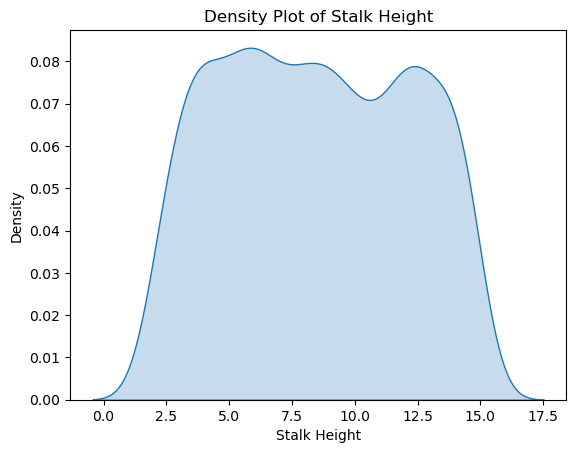

In [8]:
import seaborn as sns

# Density plots
sns.kdeplot(data['stalk_height'], shade=True)
plt.title('Density Plot of Stalk Height')
plt.xlabel('Stalk Height')
plt.ylabel('Density')
plt.show()

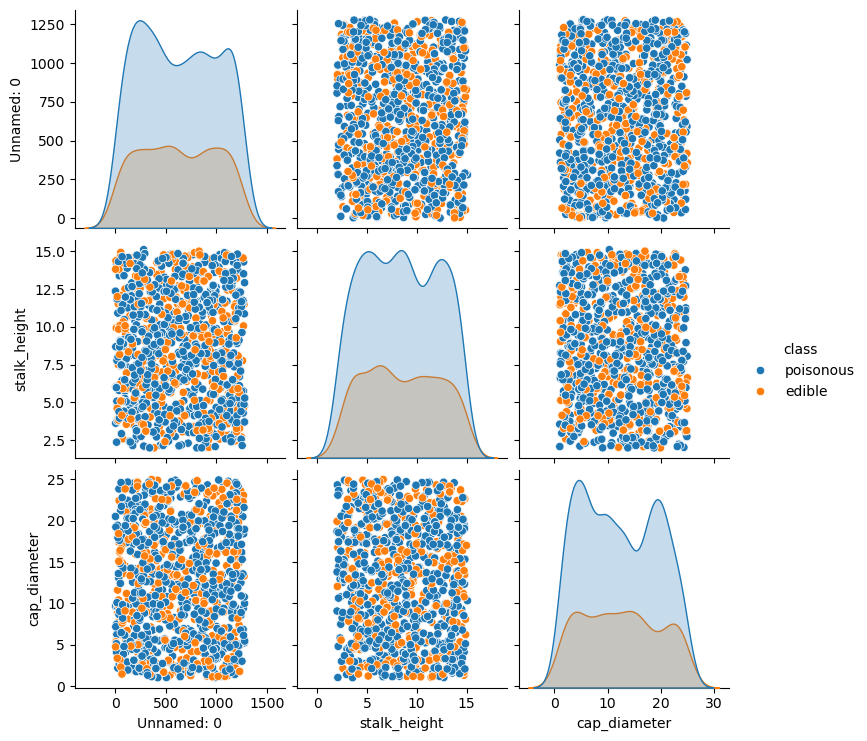

In [9]:
sns.pairplot(data, hue='class')  # Use class as the hue for differentiation
plt.show()

In [10]:
# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


In [11]:
# Correlation matrix
correlation_matrix = data_encoded.corr()

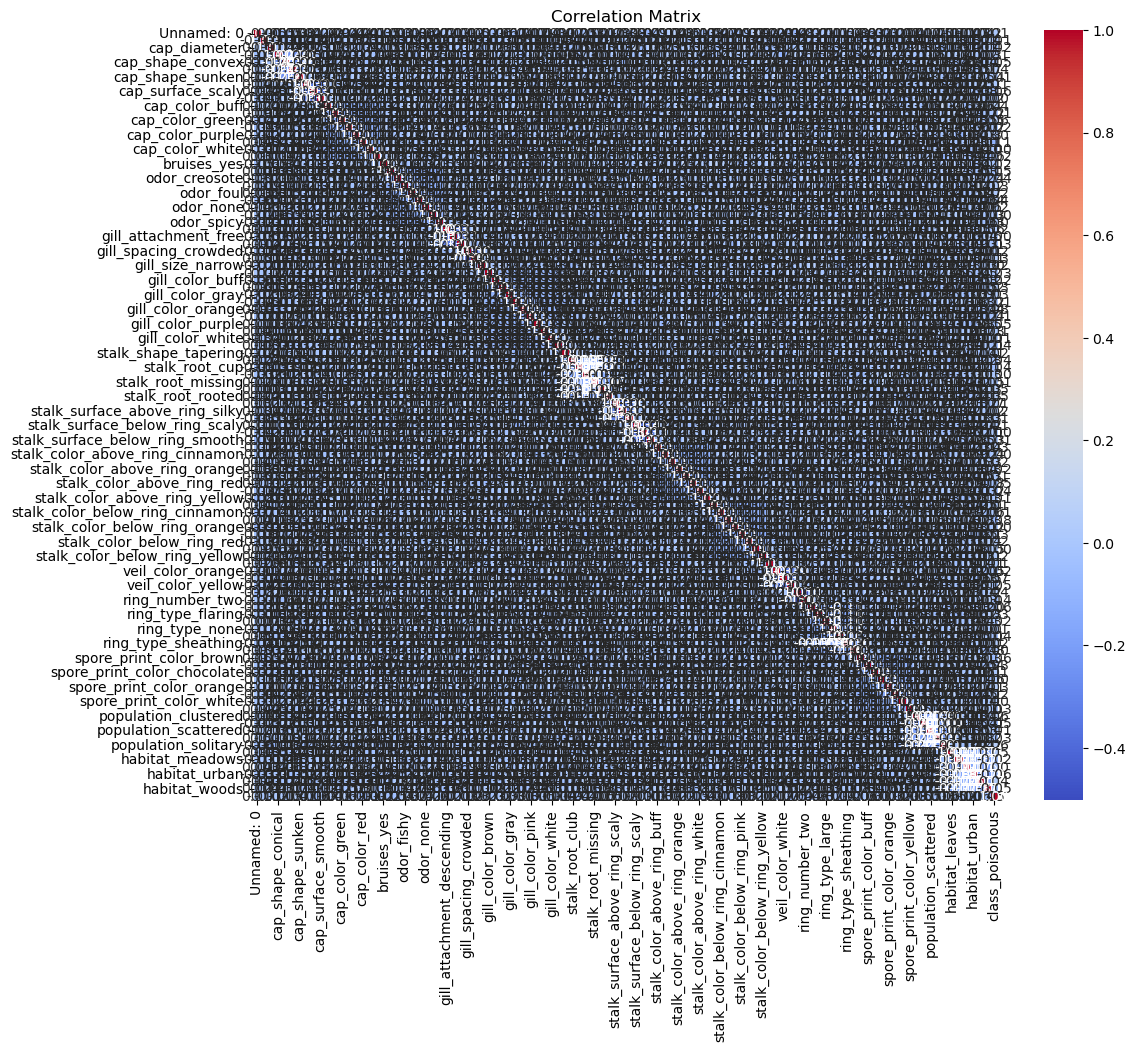

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

 Data Preprocessing
1. Encode categorical variables if necessary.
2. Split the dataset into training and testing sets.

In [13]:
print(data_encoded.head())

   Unnamed: 0  stalk_height  cap_diameter  cap_shape_conical  \
0        1167     14.276173      5.054983              False   
1        1037      3.952715     19.068319              False   
2         309      9.054265      7.205884              False   
3         282      5.226499     20.932692              False   
4         820     14.037532     12.545245              False   

   cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
0             False           False              True                False   
1             False           False              True                False   
2             False            True             False                 True   
3             False           False             False                False   
4             False            True             False                False   

   cap_surface_scaly  cap_surface_smooth  ...  population_scattered  \
0               True               False  ...                 False   
1   

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Define features (X) and target variable (y)
X = data_encoded.drop('class_poisonous', axis=1)  # Replace 'class_poisonous' with your actual target column name
y = data_encoded['class_poisonous']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (1600, 105), (1600,)
Testing set shape: (400, 105), (400,)


Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, drop_first=True)  # One-Hot Encoding

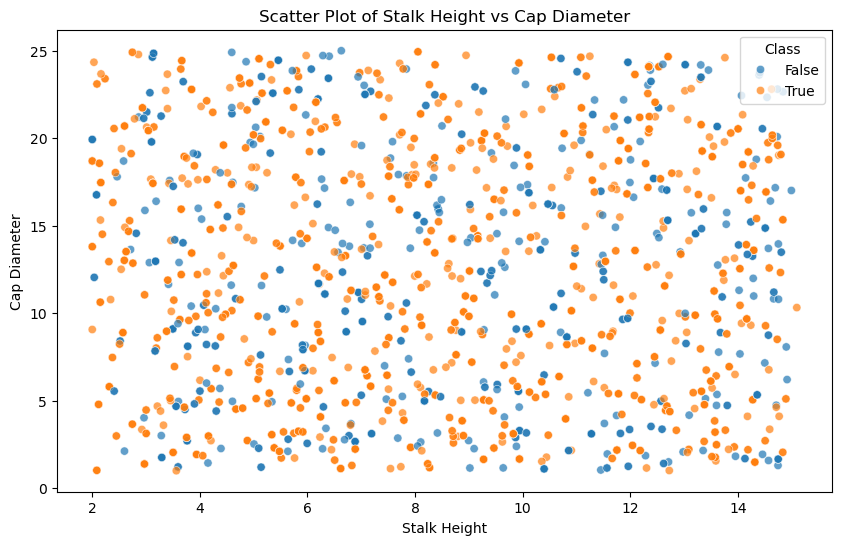

In [18]:
# Scatter plot of stalk height vs cap diameter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='stalk_height', y='cap_diameter', hue='class_poisonous', alpha=0.7)
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.legend(title='Class')
plt.show()

 Visualizing Class Distributions:

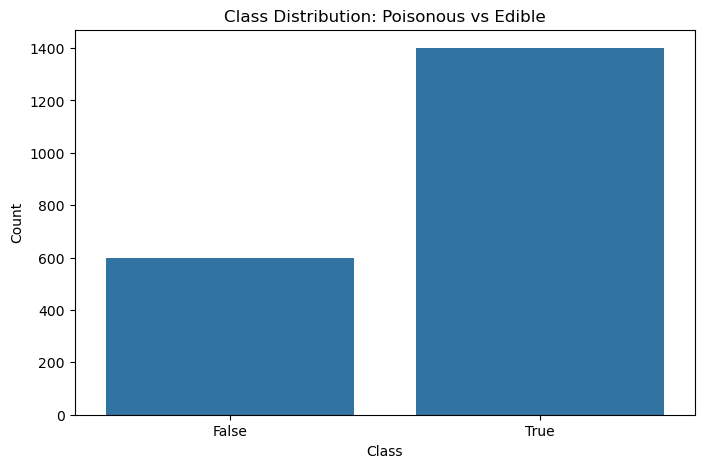

In [19]:
# Count plot for class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class_poisonous', data=data_encoded)
plt.title('Class Distribution: Poisonous vs Edible')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

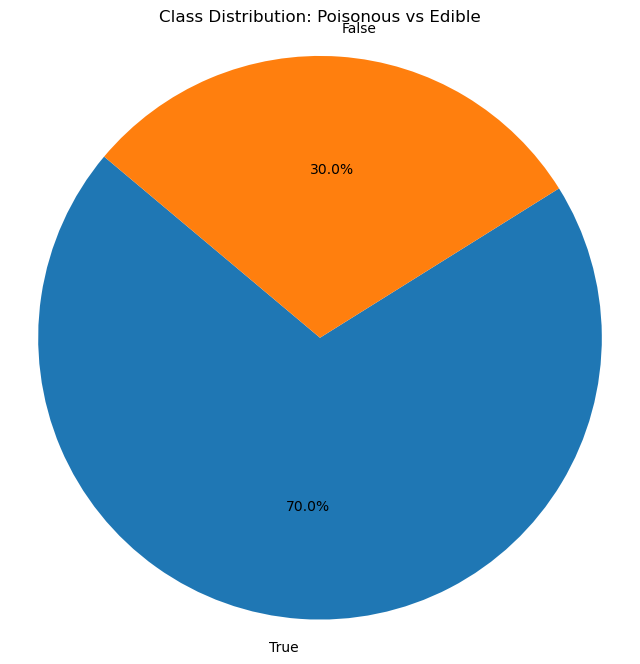

In [20]:
# Pie chart for class distribution
class_counts = data_encoded['class_poisonous'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution: Poisonous vs Edible')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Summary
Scatter Plots: Visualized relationships between stalk_height and cap_diameter.
Pair Plots: Explored interactions among selected features with respect to mushroom classification.
Class Distribution: Used count plots and pie charts to assess the balance between poisonous and edible mushrooms

Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded.drop('class_poisonous', axis=1)  # Adjust based on your target column name
y = data_encoded['class_poisonous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also try 'rbf' or other kernels

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.67
Precision: 0.67
Recall: 1.00
F1 Score: 0.80


Here’s a detailed evaluation of these metrics:
Accuracy: 0.67
Accuracy indicates that 67% of the predictions made by the model were correct. While this might seem reasonable, accuracy alone can be misleading, especially in imbalanced datasets where one class significantly outnumbers another.
Precision: 0.67
Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.67 means that when the model predicts a mushroom is poisonous, it is correct 67% of the time. This suggests that there are some false positives (edible mushrooms incorrectly classified as poisonous).
Recall: 1.00
Recall (also known as sensitivity) indicates that the model correctly identifies all actual positive cases (poisonous mushrooms). A recall of 1.00 means that there are no false negatives; every poisonous mushroom in the test set was correctly classified as such. This is a strong performance, indicating the model's effectiveness in identifying poisonous mushrooms.
F1 Score: 0.80
The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1 score of 0.80 indicates a good balance between precision and recall, suggesting that while the model is excellent at identifying poisonous mushrooms, it also maintains a reasonable level of accuracy when it comes to edible mushrooms.
Summary
The model performs exceptionally well in terms of recall, ensuring that all poisonous mushrooms are identified.
However, the accuracy and precision indicate that there may be room for improvement, particularly in reducing false positives.
This performance suggests that while the model is effective for identifying dangerous mushrooms, further tuning or additional features might be needed to improve overall classification accuracy and precision.
Given these metrics, you might consider exploring:
Hyperparameter tuning to optimize the SVM model.
Trying different kernels (e.g., RBF) to see if they improve performance.
Implementing techniques to handle class imbalance if applicable.

Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded.drop('class_poisonous', axis=1)  # Adjust based on your target column name
y = data_encoded['class_poisonous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

In [28]:
# Create a DataFrame for actual vs predicted results
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

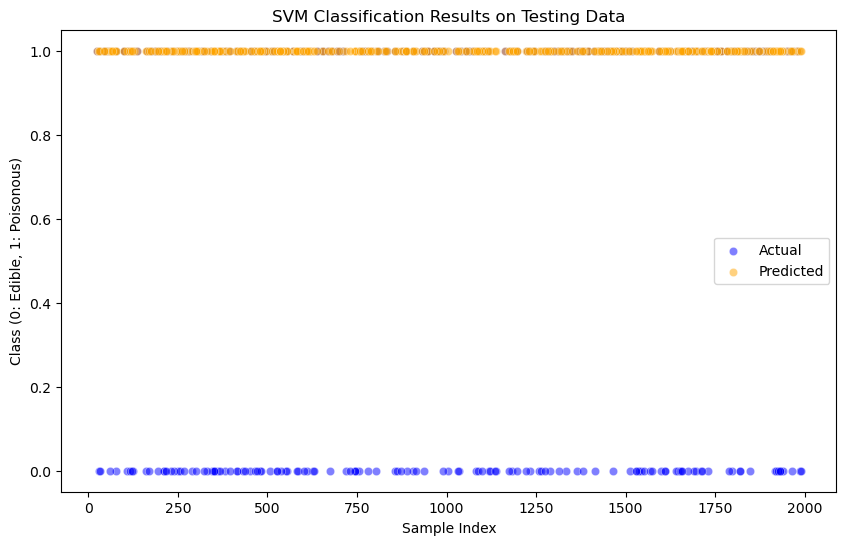

In [29]:
# Map class labels to colors for better visualization
results_df['Color'] = results_df['Actual'].map({1: 'red', 0: 'green'})  # Assuming 1 is poisonous and 0 is edible

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x=results_df.index, y=results_df['Actual'], color='blue', alpha=0.5, label='Actual')
sns.scatterplot(data=results_df, x=results_df.index, y=results_df['Predicted'], color='orange', alpha=0.5, label='Predicted')
plt.title('SVM Classification Results on Testing Data')
plt.xlabel('Sample Index')
plt.ylabel('Class (0: Edible, 1: Poisonous)')
plt.legend()
plt.show()

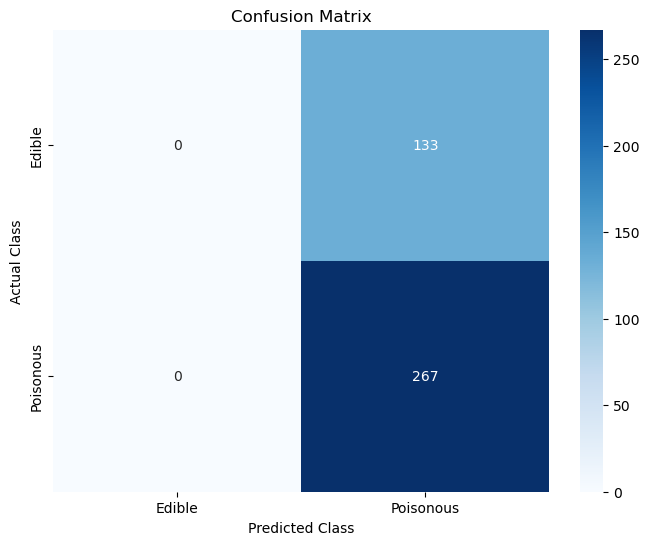

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

Scatter Plot: This plot shows actual vs. predicted classifications for each sample in the test set.
Confusion Matrix: This provides a clear view of true positives, true negatives, false positives, and false negatives.

Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [32]:

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded.drop('class_poisonous', axis=1)  # Adjust based on your target column name
y = data_encoded['class_poisonous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Set up the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],                     # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],        # Kernel types to try
    'gamma': ['scale', 'auto', 0.01, 0.1]       # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

Summary of Steps
Parameter Grid: Defined a grid of hyperparameters including C, kernel, and gamma.
Grid Search: Implemented GridSearchCV to find optimal hyperparameters through cross-validation.
Model Evaluation: Evaluated the best model using classification metrics

In [34]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [36]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [39]:
# Create a SVM classifier instance
svm_classifier = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [42]:
# Make predictions with the best model
y_pred_best = best_estimator.predict(X_test_scaled)

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

       False       0.89      0.71      0.79       133
        True       0.87      0.96      0.91       267

    accuracy                           0.88       400
   macro avg       0.88      0.83      0.85       400
weighted avg       0.88      0.88      0.87       400



Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [47]:

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded.drop('class_poisonous', axis=1)  # Adjust based on your target column name
y = data_encoded['class_poisonous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Create and train the SVM model with the specified kernel
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test_scaled)

    # Store performance metrics safely
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Initialize metrics dictionary
    metrics = {'accuracy': report['accuracy']}
    
    # Safely access precision, recall, and f1-score for each class
    for label in report.keys():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            metrics[label] = {
                'precision': report[label]['precision'],
                'recall': report[label]['recall'],
                'f1_score': report[label]['f1-score']
            }
    
    results[kernel] = metrics

# Display results
for kernel in results:
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {results[kernel]['accuracy']:.2f}")
    for label in results[kernel]:
        if label not in ['accuracy']:
            print(f"Label: {label} - Precision: {results[kernel][label]['precision']:.2f}, Recall: {results[kernel][label]['recall']:.2f}, F1 Score: {results[kernel][label]['f1_score']:.2f}")
    print("\n")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: linear
Accuracy: 0.67
Label: False - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Label: True - Precision: 0.67, Recall: 1.00, F1 Score: 0.80


Kernel: poly
Accuracy: 0.89
Label: False - Precision: 1.00, Recall: 0.65, F1 Score: 0.79
Label: True - Precision: 0.85, Recall: 1.00, F1 Score: 0.92


Kernel: rbf
Accuracy: 0.83
Label: False - Precision: 0.94, Recall: 0.54, F1 Score: 0.69
Label: True - Precision: 0.81, Recall: 0.98, F1 Score: 0.89




In [49]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

Analyze SVM Strengths and Weaknesses for the Mushroom Dataset
Strengths:
Effective in High Dimensions: SVMs are particularly effective in high-dimensional spaces, making them suitable for datasets like mushrooms where multiple features can influence classification.
Robust to Overfitting: With appropriate regularization (C parameter), SVMs can be robust to overfitting, especially in cases where the number of dimensions exceeds the number of samples.
Versatile Kernel Functions: The ability to use different kernels allows SVMs to adapt to various data distributions. For example, using an RBF kernel can capture non-linear relationships effectively.
Weaknesses:
Computationally Intensive: Training SVMs can be computationally expensive, especially with large datasets or when using complex kernels.
Sensitivity to Noise: SVMs can be sensitive to noisy data points and outliers, which may lead to suboptimal decision boundaries.
Choice of Hyperparameters: The performance heavily depends on the choice of hyperparameters (e.g., C and kernel type). Poorly chosen parameters can lead to underfitting or overfitting.
3. Discuss Practical Implications of SVM in Real-World Classification Tasks
SVMs have several practical implications in real-world classification tasks:
Medical Diagnosis: In fields like healthcare, SVMs can classify diseases based on various biomarkers or patient features. Their ability to handle high-dimensional data makes them suitable for genomics and proteomics.
Image Classification: SVMs are widely used in image recognition tasks where they classify images based on pixel values or extracted features. They can effectively separate different categories of images.
Text Classification: In natural language processing (NLP), SVMs are used for tasks such as spam detection or sentiment analysis by classifying text documents based on their content.
Financial Forecasting: In finance, SVMs can help predict stock prices or classify credit risk by analyzing historical data patterns.
In summary, while SVMs offer powerful classification capabilities across various domains due to their flexibility and effectiveness in high-dimensional spaces, practitioners must carefully consider their limitations and choose appropriate hyperparameters for optimal performance

Practical Implications of SVM in Real-World Classification Tasks:-


Support Vector Machines (SVMs) are powerful tools for classification tasks across various domains. Their ability to handle complex data distributions and high-dimensional spaces makes them particularly useful in real-world applications. Here are some key practical implications of using SVMs:
1. Medical Diagnosis
SVMs are extensively used in healthcare for diagnosing diseases based on various biomarkers or patient features. For example, in genomics, SVMs can classify gene expression data to predict cancer types or other diseases. Their effectiveness in high-dimensional spaces allows them to analyze complex biological data, improving diagnostic accuracy.
2. Image Classification
In the field of computer vision, SVMs are widely employed for image classification tasks. They classify images based on pixel values or extracted features, effectively distinguishing between different categories such as identifying objects in photographs or recognizing handwritten digits. The versatility of SVM kernels enables them to adapt to the unique characteristics of image data.
3. Text Classification
SVMs play a significant role in natural language processing (NLP) applications, such as spam detection and sentiment analysis. By classifying text documents based on their content, SVMs can effectively filter out unwanted emails or analyze public sentiment towards products or services. Their ability to handle high-dimensional feature spaces (e.g., word vectors) makes them suitable for these tasks.
4. Financial Forecasting
In finance, SVMs are used for predicting stock prices and assessing credit risk. By analyzing historical data patterns, SVMs can classify market trends and make predictions about future price movements. Their robustness against overfitting helps ensure reliable predictions, which is crucial for financial decision-making.
5. Quality Control in Manufacturing
SVMs can be applied in quality control processes within manufacturing industries. By classifying products based on various features (e.g., dimensions, weight), SVMs can help identify defective items and ensure that only products meeting quality standards reach consumers.
Summary
SVMs offer robust classification capabilities across diverse domains due to their flexibility and effectiveness in handling high-dimensional data. However, practitioners must consider the computational cost and sensitivity to noise when deploying SVMs in real-world applications. Proper hyperparameter tuning is essential to optimize performance and ensure that the model generalizes well to unseen data.
In conclusion, the practical implications of SVMs extend far beyond academic research; they provide valuable solutions in critical areas such as healthcare, finance, and technology, driving advancements and improving outcomes across various sectors.